In [1]:
# %load command.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
# plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


In [2]:
# convert strings to datetime

df=pd.DataFrame({'date':['3/10/2022', '3/11/2022', '3/12/2022'],
            'value':[2,3,4]}
            )
df
df.info()

,date,value
0,3/10/2022,2
1,3/11/2022,3
2,3/12/2022,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   value   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [3]:
df['date']=pd.to_datetime(df['date'])
df

,date,value
0,2022-03-10,2
1,2022-03-11,3
2,2022-03-12,4


In [4]:
df=pd.DataFrame({'date':['3/10/2022', '3/11/2022', '3/12/2022'],
            'value':[2,3,4]}
            )

In [5]:
df['date']=pd.to_datetime(df['date'], format='%m/%d/%Y')
df
df.info()

,date,value
0,2022-03-10,2
1,2022-03-11,3
2,2022-03-12,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [6]:
# handling parsing error
df=pd.DataFrame({'date':['3/10/2022', 'a/11/2022', '3/12/2022'],
            'value':[2,3,4]}
            )

df['date']=pd.to_datetime(df['date'])

ParserError: Unknown string format: a/11/2022

In [7]:
df=pd.DataFrame({'date':['3/10/2022', 'a/11/2022', '3/12/2022'],
            'value':[2,3,4]}
            )

df['date']=pd.to_datetime(df['date'], errors='ignore')
df

,date,value
0,3/10/2022,2
1,a/11/2022,3
2,3/12/2022,4


In [8]:
df=pd.DataFrame({'date':['3/10/2022', 'a/11/2022', '3/12/2022'],
            'value':[2,3,4]}
            )

df['date']=pd.to_datetime(df['date'], errors='coerce')
df

,date,value
0,2022-03-10,2
1,NaT,3
2,2022-03-12,4


In [9]:
# assemble a datetime from multiple columns

df=pd.DataFrame({'year':[2021, 2022],
            'month':[2,3],
                'day':[10, 20]}
            )

df['date']=pd.to_datetime(df, errors='ignore')
df

,year,month,day,date
0,2021,2,10,2021-02-10
1,2022,3,20,2022-03-20


In [10]:
# get year, month and day


df=pd.DataFrame({'name':['Tom', 'Andy', 'Lucas'],
            'DoB':['08-05-1997', '03-20-1995', '12-16-1970']}
            )

df.info()
df['DoB']=pd.to_datetime(df['DoB'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   DoB     3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    3 non-null      object        
 1   DoB     3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


In [11]:
df['year']=df['DoB'].dt.year
df['month']=df['DoB'].dt.month
df['day']=df['DoB'].dt.day

df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1995-03-20,1995,3,20
2,Lucas,1970-12-16,1970,12,16


In [12]:
# get the week of year, the day of week and leap year

df['week_of_year']=df['DoB'].dt.isocalendar().week
df['day_of_week']=df['DoB'].dt.weekday
df['is_leap_year']=df['DoB'].dt.is_leap_year
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1995-03-20,1995,3,20,12,0,False
2,Lucas,1970-12-16,1970,12,16,51,2,False


In [13]:
# mapping

mapping={0: 'Monday', 
        1:'Tuesday',
        2:'Wednesday',
        3:'Thursday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday'}

df['day_of_week_name']=df['DoB'].dt.weekday.map(mapping)
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1995-03-20,1995,3,20,12,0,False,Monday
2,Lucas,1970-12-16,1970,12,16,51,2,False,Wednesday


In [14]:
# get the age from the date of birth

today=pd.to_datetime('today')
df['age']=today.year-df['year']
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,25
1,Andy,1995-03-20,1995,3,20,12,0,False,Monday,27
2,Lucas,1970-12-16,1970,12,16,51,2,False,Wednesday,52


In [15]:
today=pd.to_datetime('today')
diff_y=today.year-df['year']

# haven't had birthday
bir_md=df['DoB'].apply(lambda x:(x.month, x.day))
no_birthday=bir_md>(today.month, today.day)
print(no_birthday)

df['age']=diff_y-no_birthday
df

0     True
1    False
2     True
Name: DoB, dtype: bool


,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,24
1,Andy,1995-03-20,1995,3,20,12,0,False,Monday,27
2,Lucas,1970-12-16,1970,12,16,51,2,False,Wednesday,51


In [16]:
df=pd.read_csv('city_sales.csv', parse_dates=['date'])
df.head()

,date,num,city
0,2015-01-01 09:00:00,4,London
1,2015-01-01 09:01:00,4,London
2,2015-01-01 09:02:00,3,London
3,2015-01-01 09:03:00,3,London
4,2015-01-01 09:04:00,3,London


In [17]:
# improve performance by setting data column as the index
df=df.set_index(['date'])
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


In [18]:
df.loc['2019']

,num,city
date,,
2019-01-01 09:00:00,2,London
2019-01-01 09:01:00,3,London
2019-01-01 09:02:00,3,London
2019-01-01 09:03:00,4,London
2019-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


In [19]:
# select data with a specific year and perform aggregation

df.loc['2019']['num'].sum()

108656

In [20]:
# select data with a specific month or a specific day of the month
df.loc['2018-5']

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-31 15:56:00,3,Cambridge
2018-05-31 15:57:00,4,Cambridge
2018-05-31 15:58:00,2,Cambridge


In [21]:
df.loc['2018-5-1']

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-01 15:56:00,2,Cambridge
2018-05-01 15:57:00,3,Cambridge
2018-05-01 15:58:00,3,Cambridge


In [22]:
cond=df.index.month==2
df[cond]
df.loc[cond, 'num'].sum()

,num,city
date,,
2015-02-02 09:00:00,4,London
2015-02-02 09:01:00,3,London
2015-02-02 09:02:00,3,London
2015-02-02 09:03:00,2,London
2015-02-02 09:04:00,1,London
...,...,...
2018-02-28 15:56:00,4,Cambridge
2018-02-28 15:57:00,3,Cambridge
2018-02-28 15:58:00,4,Cambridge


382193

In [23]:
sum_month=[]
for i in range(1, 13):
    cond=df.index.month==i
    sum_month.append(df[cond]['num'].sum())
    
print(sum_month)

[524038, 382193, 425060, 395761, 419362, 410367, 410724, 424823, 400816, 414918, 410007, 411033]


<BarContainer object of 12 artists>

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

Text(0.5, 1.02, 'Sales by Month')

Text(0.5, 0, 'Ages')

Text(0, 0.5, 'Sales')

(0.0, 600000.0)

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, 0.0, '0'),
 Text(0, 100000.0, ' 100k'),
 Text(0, 200000.0, ' 200k'),
 Text(0, 300000.0, ' 300k'),
 Text(0, 400000.0, ' 400k'),
 Text(0, 500000.0, ' 500k'),
 Text(0, 600000.0, ' 600k')]

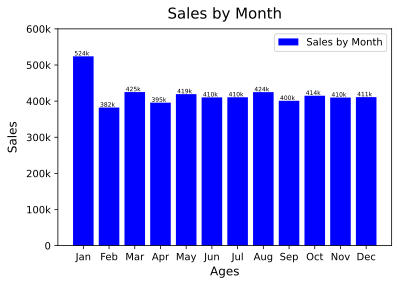

In [24]:
# %load "template/barTem.py"
#!/usr/bin/env python

# In[ ]:

fig, ax=plt.subplots()

month_x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_indexes=np.arange(len(month_x)) 
y=sum_month

ax.bar(x_indexes, y, color='blue', label='Sales by Month')
ax.legend(prop={'size':10})
ax.set_xticks(x_indexes)
ax.set_xticklabels(month_x,fontsize=10)
ax.set_title("Sales by Month", fontsize=15, y=1.02)
ax.set_xlabel("Ages", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
ax.set_ylim((0, 600000))

y_labels=[f'{item/1000: n}k' for item in ax.get_yticks()]
y_labels[0]=0
ax.set_yticklabels(y_labels, fontsize=10)


def addNumbertoBar(x_list, y_list):
    for i in range(1, len(y_list)+1):
        ax.annotate(f'{int(y_list[i-1]/1000):}k', (x_indexes[i-1]-0.35, y_list[i-1]+7000), va='center', fontsize=6)
        
addNumbertoBar(x_indexes, y)

In [25]:
# Select data between two dates

df.loc['2016':'2018']

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


,num,city
date,,
2016-01-01 09:00:00,4,London
2016-01-01 09:01:00,3,London
2016-01-01 09:02:00,4,London
2016-01-01 09:03:00,4,London
2016-01-01 09:04:00,2,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [26]:
df.loc['2018-5-2 10':'2018-5-2 11']

,num,city
date,,
2018-05-02 10:00:00,2,London
2018-05-02 10:01:00,3,London
2018-05-02 10:02:00,4,London
2018-05-02 10:03:00,4,London
2018-05-02 10:04:00,4,London
...,...,...
2018-05-02 11:55:00,3,Cambridge
2018-05-02 11:56:00,3,Cambridge
2018-05-02 11:57:00,4,Cambridge


In [27]:
df.loc['2018-5-2 10:30':'2018-5-2 11:30']

,num,city
date,,
2018-05-02 10:30:00,3,London
2018-05-02 10:31:00,3,London
2018-05-02 10:32:00,1,London
2018-05-02 10:33:00,3,London
2018-05-02 10:34:00,3,London
...,...,...
2018-05-02 11:26:00,4,Cambridge
2018-05-02 11:27:00,2,Cambridge
2018-05-02 11:28:00,3,Cambridge


In [28]:
df.between_time('10:30', '10:50')

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:31:00,3,London
2015-01-01 10:32:00,3,London
2015-01-01 10:33:00,3,London
2015-01-01 10:34:00,4,London
...,...,...
2019-01-31 10:46:00,3,Cambridge
2019-01-31 10:47:00,3,Cambridge
2019-01-31 10:48:00,3,Cambridge


In [29]:
df['rolling_sum']=df.rolling(3).sum()
df.head()

,num,city,rolling_sum
date,,,
2015-01-01 09:00:00,4,London,NaN
2015-01-01 09:01:00,4,London,NaN
2015-01-01 09:02:00,3,London,11.00
2015-01-01 09:03:00,3,London,10.00
2015-01-01 09:04:00,3,London,9.00


In [30]:
df['rolling_sum_4']=df['num'].rolling(4).sum()
df.head()

,num,city,rolling_sum,rolling_sum_4
date,,,,
2015-01-01 09:00:00,4,London,NaN,NaN
2015-01-01 09:01:00,4,London,NaN,NaN
2015-01-01 09:02:00,3,London,11.00,NaN
2015-01-01 09:03:00,3,London,10.00,14.00
2015-01-01 09:04:00,3,London,9.00,13.00


In [31]:
df['rolling_sum']=df['rolling_sum'].fillna(method='backfill')
df.head()

,num,city,rolling_sum,rolling_sum_4
date,,,,
2015-01-01 09:00:00,4,London,11.00,NaN
2015-01-01 09:01:00,4,London,11.00,NaN
2015-01-01 09:02:00,3,London,11.00,NaN
2015-01-01 09:03:00,3,London,10.00,14.00
2015-01-01 09:04:00,3,London,9.00,13.00


## Working with datetime in Pandas DataFrame
https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587

1.	Convert strings to datetime
2.	Assemble a datetime from multiple columns
3.	Get year, month and day
4.	Get the week of year, the day of week, and leap year
5.	Get the age from the date of birth
6.	Improve performance by setting date column as the index
7.	Select data with a specific year and perform aggregation
8.	Select data with a specific month and a specific day of the month
9.	Select data between two dates
10.	Handle missing values


### 1. Convert strings to datetime

In [32]:
import pandas as pd

df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


**Day first format**

In [33]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


**Custome format**

In [34]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'], format="%Y-%d-%m %H:%M:%S")
df

df.info()

,date,value
0,2016-10-06 20:30:00,2
1,2016-01-07 19:45:30,3
2,2013-12-10 04:05:01,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


**Speed up parsing with `infer_datetime_format`**
Passing infer_datetime_format=True can often speed up a parsing if its not an ISO8601 format exactly but in a regular format. According to [1], in some cases, this can increase the parsing speed by 5–10x.

In [35]:
# Make up 3000 rows
df = pd.DataFrame({'date': ['3/11/2000', '3/12/2000', '3/13/2000'] * 1000 })
%timeit pd.to_datetime(df['date'], infer_datetime_format=True)

%timeit pd.to_datetime(df['date'], infer_datetime_format=False)


1.27 ms ± 56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.22 ms ± 32.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Handle parsing error

In [36]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'], errors='ignore')
df

,date,value
0,3/10/2000,2
1,a/11/2000,3
2,3/12/2000,4


In [37]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


### 2. Assemble a datetime from multiple columns

In [38]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})
df['date'] = pd.to_datetime(df)
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


### 3. Get year, month, and day

In [39]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})
df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [40]:
df['year']= df['DoB'].dt.year
df['month']= df['DoB'].dt.month
df['day']= df['DoB'].dt.day
df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


In [42]:
df['week_of_year'] = df['DoB'].dt.isocalendar().week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False
